# Problèmes inverses et ingénierie - approche stochastique et statistique

## Time-reversal refocusing in homogeneous and randomly heterogeneous media

Victor Jesequel - Cyrielle Théobald

Imports

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

### 1 - Paraxial approximation in a homogeneous medium.

Parameters

In [69]:
radius = 2
N_points_x = 2**10
x_max = 60
k = 1
w = 1
L = 10
N_points_z = 100

Compute numerically the transmitted wave profile

In [70]:
# Spatial grid (x-axis and z-axis)
x = np.linspace(-x_max/2, x_max/2, N_points_x)
dx = x[1] - x[0]
z = np.linspace(0, L, N_points_z)
dz = z[1] - z[0]

# Initial gaussian at z = 0
phi_0 = np.exp(-x**2/(radius**2))

# Frequencies for the FFT
frequencies = 2*np.pi*np.fft.fftfreq(N_points_x, dx)

# Solving the Schrödinger equation using the Fourier method:
# 2ik dzψ + d²xψ = 0
phi = phi_0.copy() # At z = 0

for zi in z:
    phi_hat = np.fft.fft(phi)
    # Propagate in Fourier space
    phi_hat = phi_hat * np.exp(-1j * frequencies**2 * dz / (2 * k))
    phi = np.fft.ifft(phi_hat) 

phi_t = phi # At z = L


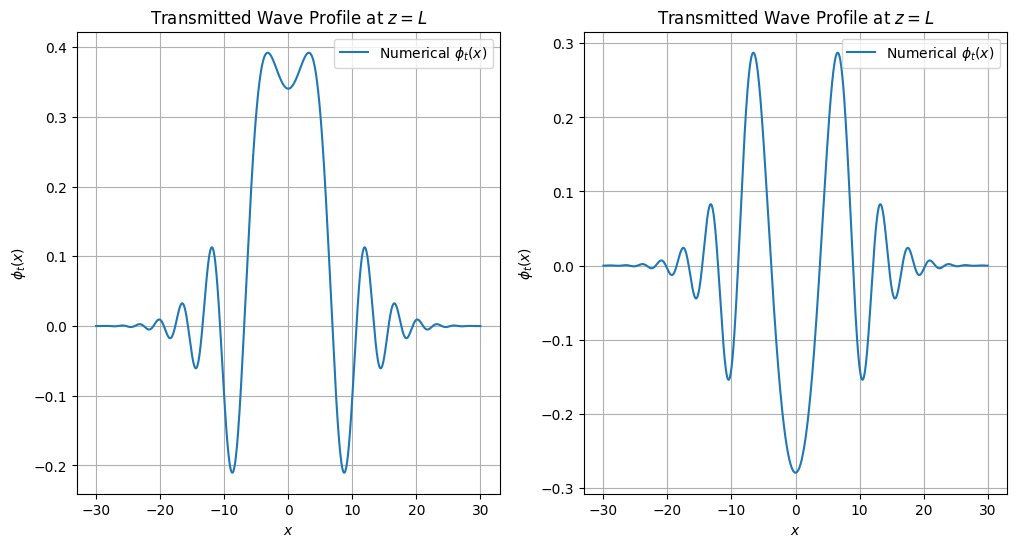

In [79]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Transmitted Wave Profile (Real Part)
axs[0].plot(x, np.real(phi_t), label=r"Numerical $\phi_t(x)$")
axs[0].set_xlabel("$x$")
axs[0].set_ylabel(r"$\phi_t(x)$")
axs[0].set_title("Transmitted Wave Profile at $z = L$")
axs[0].legend()
axs[0].grid(True)

# Imaginary part
axs[1].plot(x, np.imag(phi_t), label=r"Numerical $\phi_t(x)$")
axs[1].set_xlabel("$x$")
axs[1].set_ylabel(r"$\phi_t(x)$")
axs[1].set_title("Transmitted Wave Profile at $z = L$")
axs[1].legend()
axs[1].grid(True)


Compare the numerical transmitted wave with the theoretical profile

In [80]:
# Check 
rt = radius * np.sqrt(1 + 2j * L / (k * radius**2))
phi_t_theoretical = (radius / rt) * np.exp(-x**2 / rt**2)

# Check the square modulus
phi_t_sq_modulus = np.abs(phi_t)**2
phi_t_theoretical_sq_modulus = np.abs(phi_t_theoretical)**2

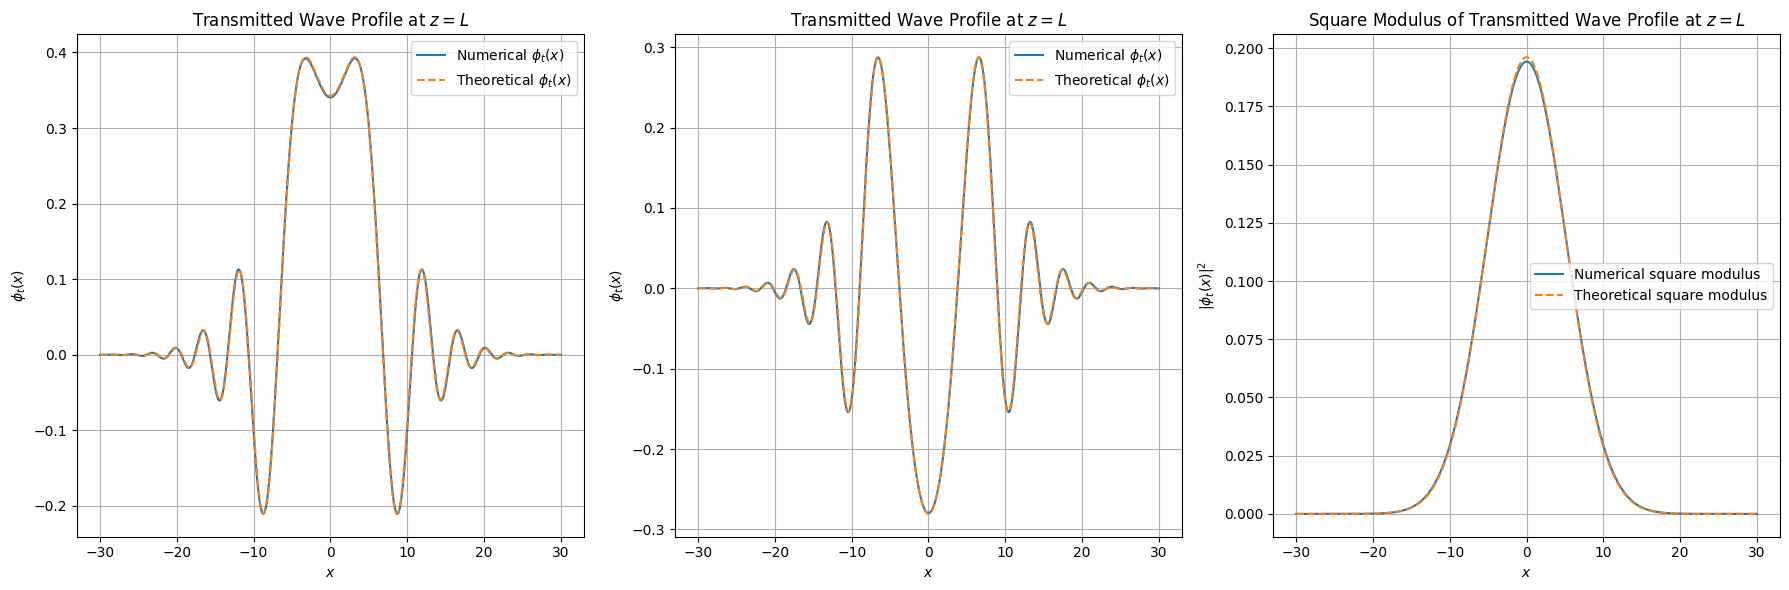

In [81]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Transmitted Wave Profile (Real Part)
axs[0].plot(x, np.real(phi_t), label=r"Numerical $\phi_t(x)$")
axs[0].plot(x, np.real(phi_t_theoretical), label=r"Theoretical $\phi_t(x)$", linestyle="--")
axs[0].set_xlabel("$x$")
axs[0].set_ylabel(r"$\phi_t(x)$")
axs[0].set_title("Transmitted Wave Profile at $z = L$")
axs[0].legend()
axs[0].grid(True)

# Imaginary part
axs[1].plot(x, np.imag(phi_t), label=r"Numerical $\phi_t(x)$")
axs[1].plot(x, np.imag(phi_t_theoretical), label=r"Theoretical $\phi_t(x)$", linestyle="--")
axs[1].set_xlabel("$x$")
axs[1].set_ylabel(r"$\phi_t(x)$")
axs[1].set_title("Transmitted Wave Profile at $z = L$")
axs[1].legend()
axs[1].grid(True)

# Square Modulus
axs[2].plot(x, phi_t_sq_modulus, label="Numerical square modulus")
axs[2].plot(x, phi_t_theoretical_sq_modulus, "--", label="Theoretical square modulus")
axs[2].set_xlabel("$x$")
axs[2].set_ylabel(r"$|\phi_t(x)|^2$")
axs[2].set_title("Square Modulus of Transmitted Wave Profile at $z = L$")
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()

### 2 - Time reversal for time-harmonic waves in a homogeneous medium.

In [82]:
z = np.linspace(L, 2*L, N_points_z)
dz = z[1] - z[0]

def time_reversal_mirror(x, r_M):
    """Time-reversal mirror in the plane z=L"""
    ksi = (1 - (x / r_M)**2)**2
    indicator = np.abs(x) < 2*r_M
    return ksi*indicator

def time_reversal_mirror_gaussian(x, r_M):
    """Gaussian time-reversal mirror"""
    return np.exp(-x**2 / r_M**2) 

def time_reversal_experiment(phi_t, r_M, gaussian_mirror = False):
    """Perform time-reversal experiment."""
    
    # Time-reversed wave at z = L
    if not gaussian_mirror:
        phi_tr_L = np.conj(phi_t) * time_reversal_mirror(x, r_M)
    else :
        phi_tr_L = np.conj(phi_t) * time_reversal_mirror_gaussian(x, r_M)
    
    # Propagate phi_tr from z = L to z = 2L
    phi_tr = phi_tr_L.copy()
    for zi in z:
        phi_tr_hat = np.fft.fft(phi_tr)
        phi_tr_hat = phi_tr_hat * np.exp(-1j * frequencies**2 * dz / (2 * k))
        phi_tr = np.fft.ifft(phi_tr_hat) 
    
    return phi_tr

r_M_list = [2, 5, 10, 15, 20]
refocused_wave_list = []

for r_M in r_M_list:
    refocused_wave = time_reversal_experiment(phi_t, r_M)
    refocused_wave_list.append(refocused_wave)

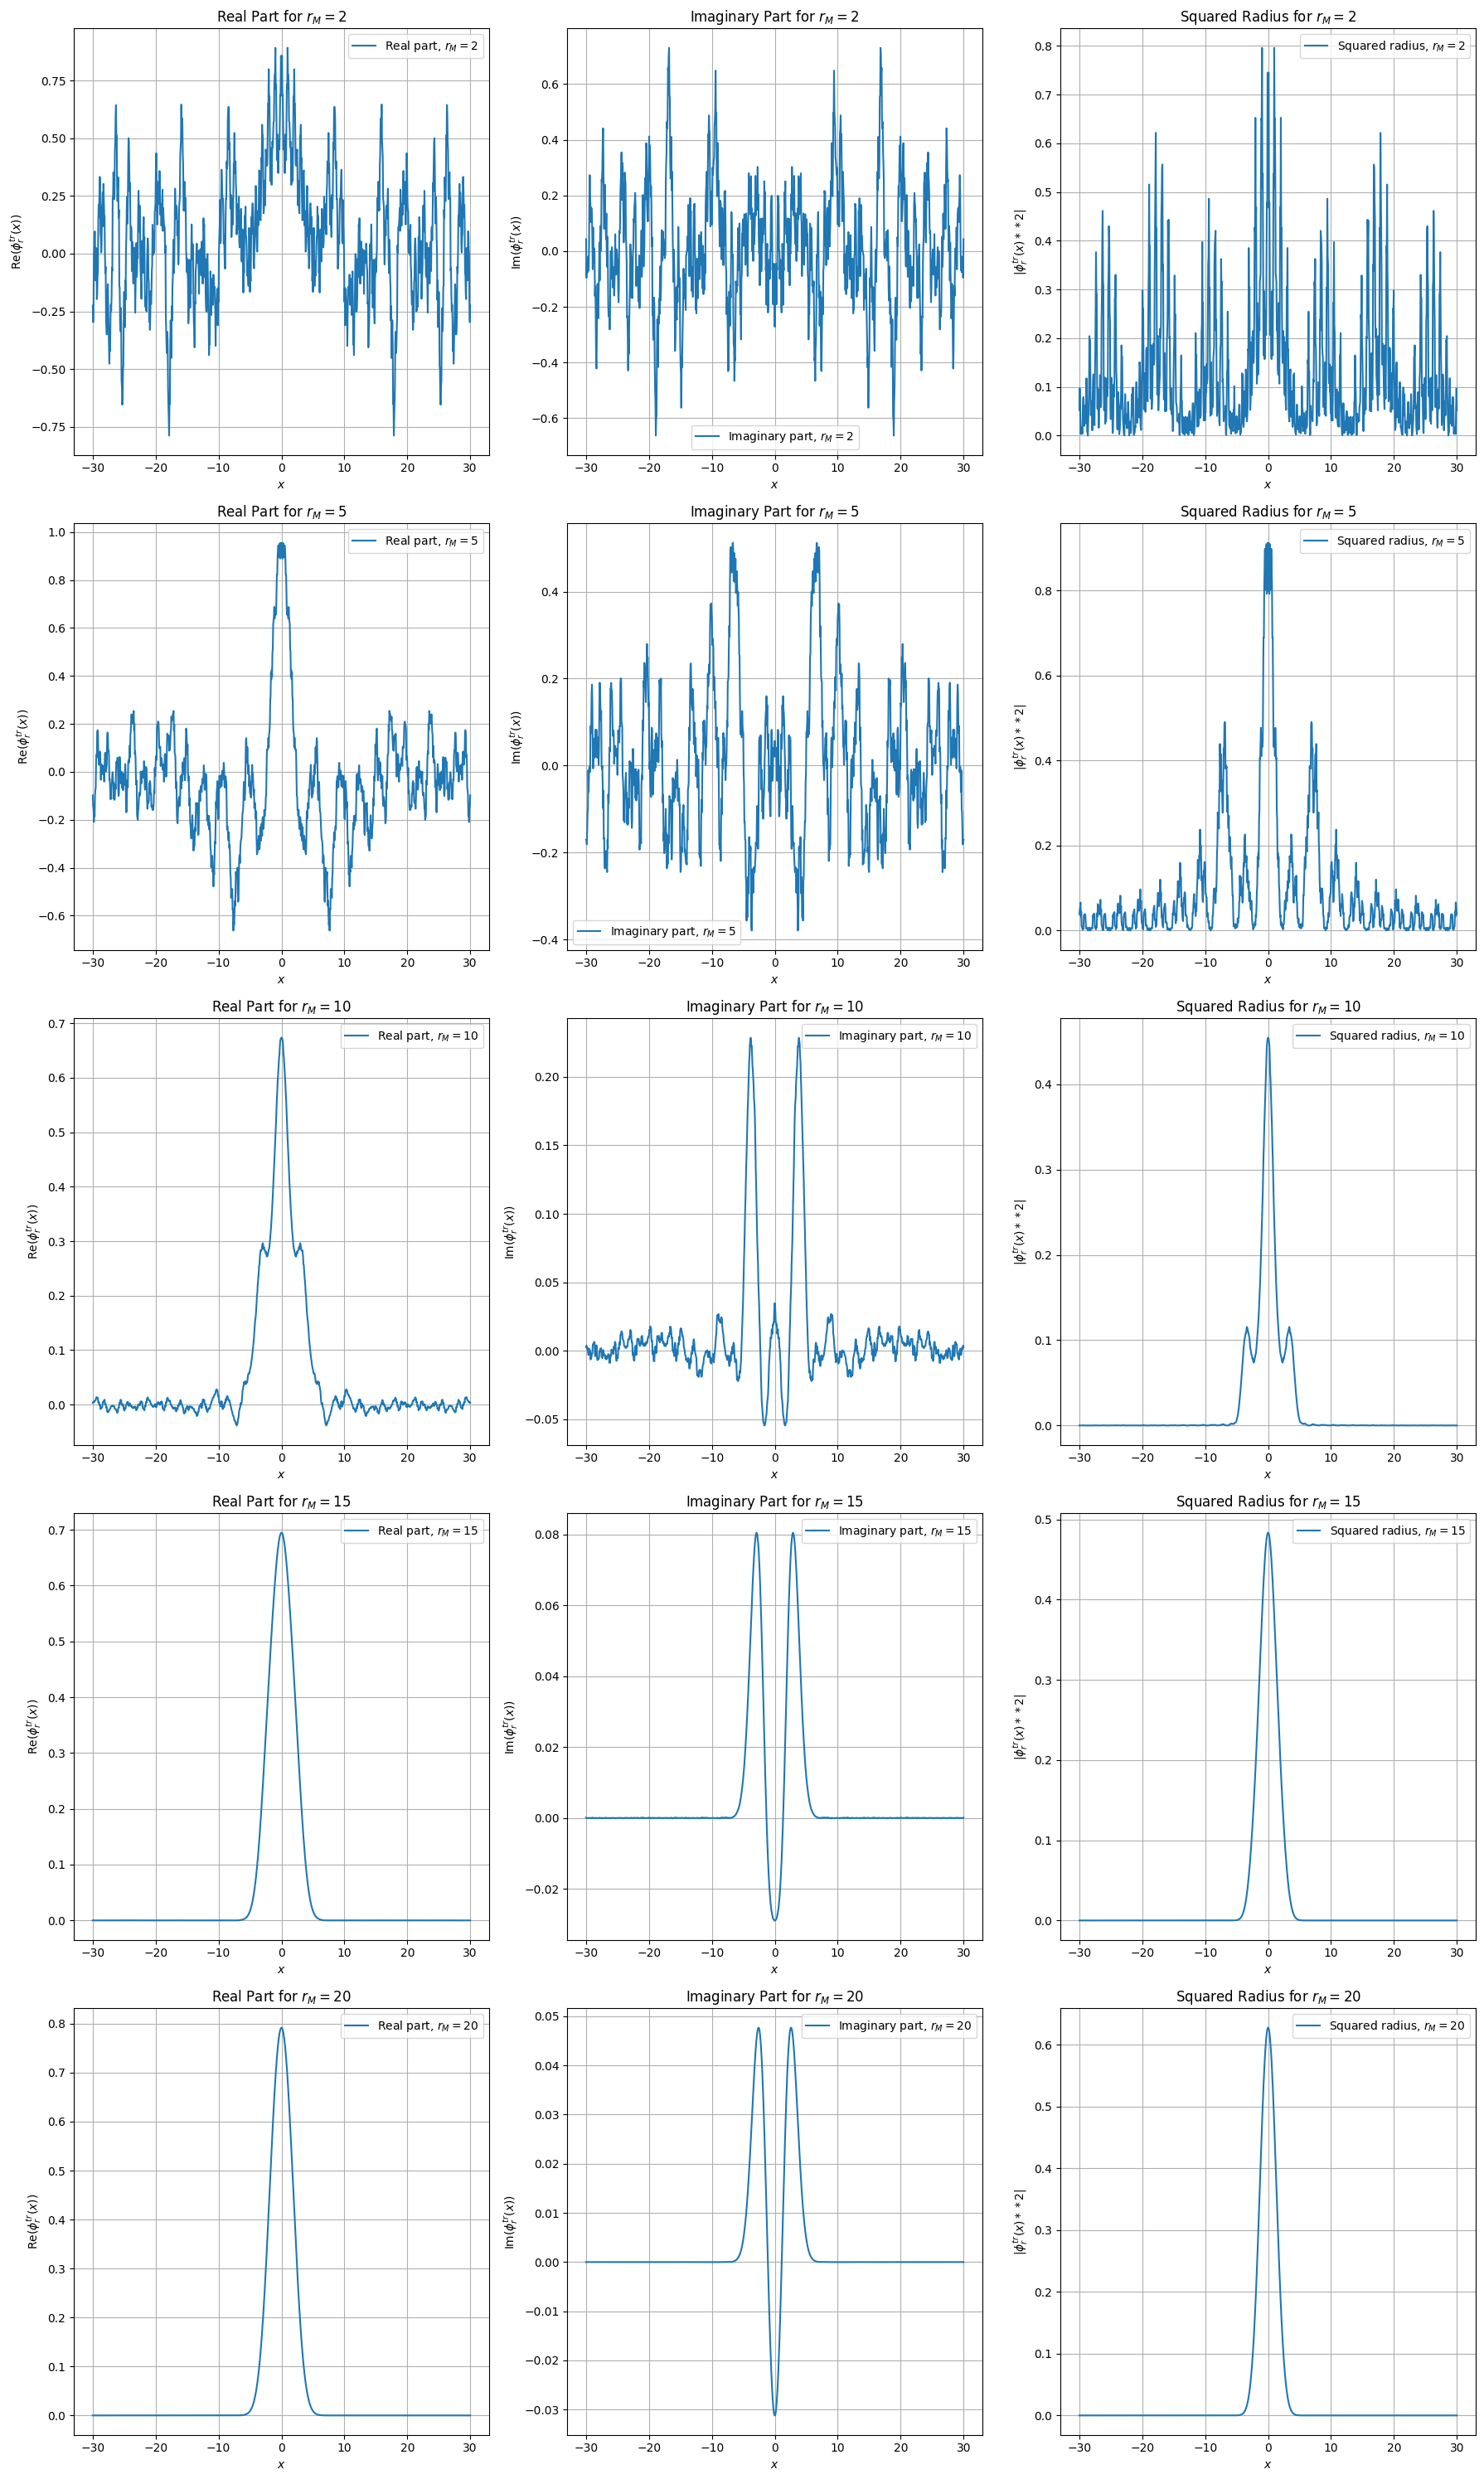

In [84]:
fig, axs = plt.subplots(len(r_M_list), 3, figsize=(18, 6 * len(r_M_list)))

for i, r_M in enumerate(r_M_list):
    # Real part
    axs[i, 0].plot(x, np.real(refocused_wave_list[i]), label=f"Real part, $r_M = {r_M}$")
    axs[i, 0].set_xlabel("$x$")
    axs[i, 0].set_ylabel(r"Re($\phi^{tr}_r(x)$)")
    axs[i, 0].set_title(f"Real Part for $r_M = {r_M}$")
    axs[i, 0].legend()
    axs[i, 0].grid(True)

    # Imaginary part
    axs[i, 1].plot(x, np.imag(refocused_wave_list[i]), label=f"Imaginary part, $r_M = {r_M}$")
    axs[i, 1].set_xlabel("$x$")
    axs[i, 1].set_ylabel(r"Im($\phi^{tr}_r(x)$)")
    axs[i, 1].set_title(f"Imaginary Part for $r_M = {r_M}$")
    axs[i, 1].legend()
    axs[i, 1].grid(True)

    # Squared Radius
    axs[i, 2].plot(x, np.abs(refocused_wave_list[i])**2, label=f"Squared radius, $r_M = {r_M}$")
    axs[i, 2].set_xlabel("$x$")
    axs[i, 2].set_ylabel(r"$|\phi^{tr}_r(x)**2|$")
    axs[i, 2].set_title(f"Squared Radius for $r_M = {r_M}$")
    axs[i, 2].legend()
    axs[i, 2].grid(True)

plt.tight_layout()
plt.show()

Check with the theoretical refocused wave profile :

In [85]:
r_M = 20
phi_tr_numerical = time_reversal_experiment(phi_t, r_M, gaussian_mirror=True)

# Theoretical refocused wave profile with r_M = 20
r_tr_squared = 1/(1 / r_M**2 + 1 / (radius**2 - 2j * L / k)) + 2j * L / k
a_tr = np.sqrt(1 + 4 * L**2 / (k**2 * radius**2 * r_M**2) + 2j * L / (k * r_M**2))

phi_tr_r_theoretical = (1 / a_tr) * np.exp(-x**2 / r_tr_squared)

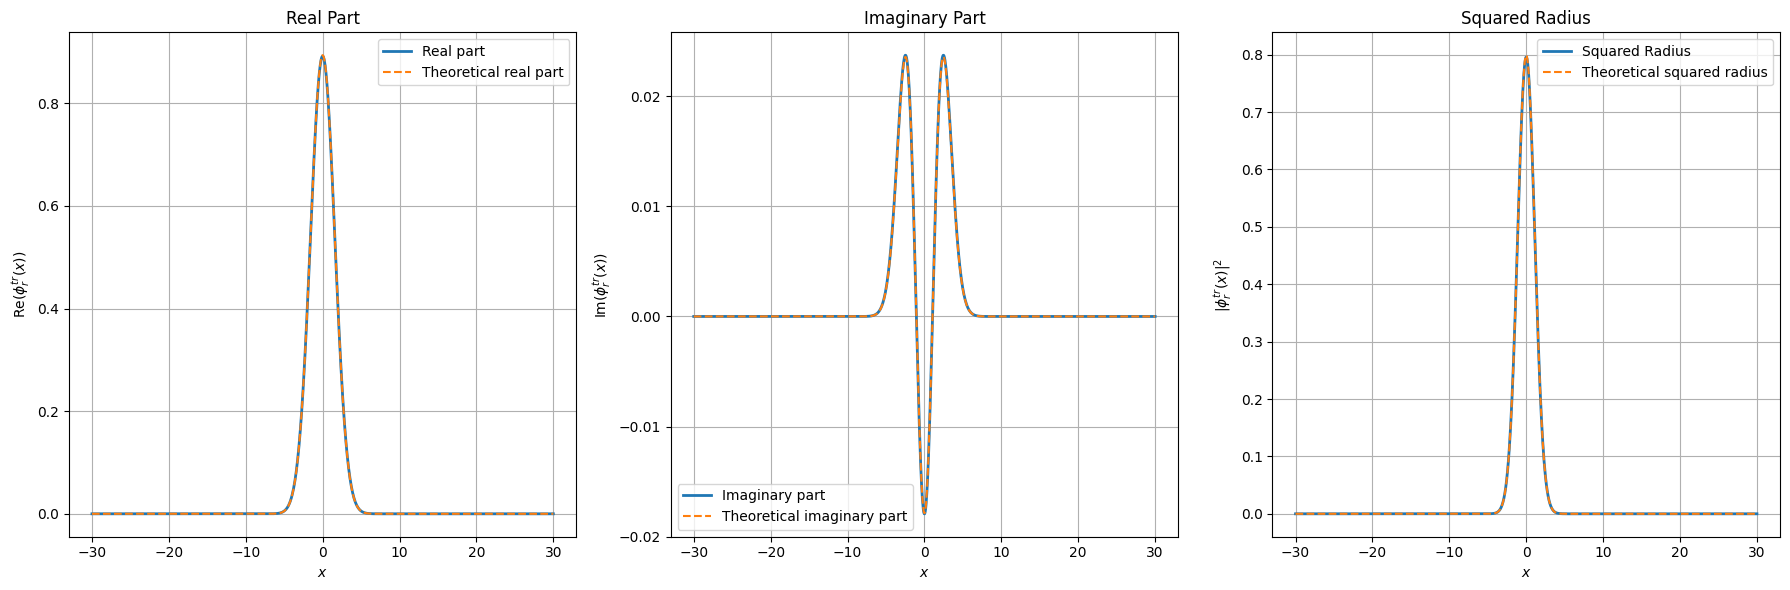

In [86]:
# Plotting the results
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Real part
axs[0].plot(x, np.real(phi_tr_numerical), label="Real part", linewidth=2)
axs[0].plot(x, np.real(phi_tr_r_theoretical), "--", label="Theoretical real part")
axs[0].set_xlabel("$x$")
axs[0].set_ylabel(r"Re($\phi^{tr}_r(x)$)")
axs[0].set_title("Real Part")
axs[0].legend()
axs[0].grid(True)

# Imaginary part
axs[1].plot(x, np.imag(phi_tr_numerical), label="Imaginary part", linewidth=2)
axs[1].plot(x, np.imag(phi_tr_r_theoretical), "--", label="Theoretical imaginary part")
axs[1].set_xlabel("$x$")
axs[1].set_ylabel(r"Im($\phi^{tr}_r(x)$)")
axs[1].set_title("Imaginary Part")
axs[1].legend()
axs[1].grid(True)

# Squared Radius
axs[2].plot(x, np.abs(phi_tr_numerical)**2, label="Squared Radius", linewidth=2)
axs[2].plot(x, np.abs(phi_tr_r_theoretical)**2, "--", label="Theoretical squared radius")
axs[2].set_xlabel("$x$")
axs[2].set_ylabel(r"$|\phi^{tr}_r(x)|^2$")
axs[2].set_title("Squared Radius")
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()

### 3 - Paraxial approximation in a random medium.

In [115]:
h = 1 
z_c = 1
x_c = 4.0 
sigma = 1.0

def generate_random_potential(N, x_c, sigma, N_points_x, x):
    """Generate a random potential of the form μ(z, x) = μ_n(z, x)"""
    
    mu = np.zeros((N, N_points_x))
    covariance_matrix = sigma**2 * np.exp(-(x[:, None] - x[None, :])**2 / x_c**2)
    mean_matrix = np.zeros(N_points_x)
    for n in range(N):
        mu[n, :] = np.random.multivariate_normal(mean_matrix, covariance_matrix)
    return mu

def split_step_fourier(phi_0, k, h, L, mu):
    phi = phi_0.copy()
    phi_hat = np.fft.fft(phi)
    operator = np.exp(-1j * (frequencies**2 / (2 * k)) * h)
    for z in range(0, L, h):
        phi_hat *= operator  # Fourier step
        phi = np.fft.ifft(phi_hat) * np.exp(1j * (k / 2) * mu[z//z_c, :])  # Potential step
        phi_hat = np.fft.fft(phi)  # Transform back
    return phi

# Perform multiple runs to estimate the mean transmitted wave profile
num_iters = 100 
phi_t_runs = []
N = L // z_c
for _ in tqdm(range(num_iters)):
    mu = generate_random_potential(N, x_c, sigma, N_points_x, x)
    phi_t = split_step_fourier(phi_0, k, h, L, mu)
    phi_t_runs.append(phi_t)

phi_t_mean = np.mean(phi_t_runs, axis=0)

  0%|          | 0/100 [00:00<?, ?it/s]

 35%|███▌      | 35/100 [1:00:49<1:52:57, 104.27s/it] 


KeyboardInterrupt: 

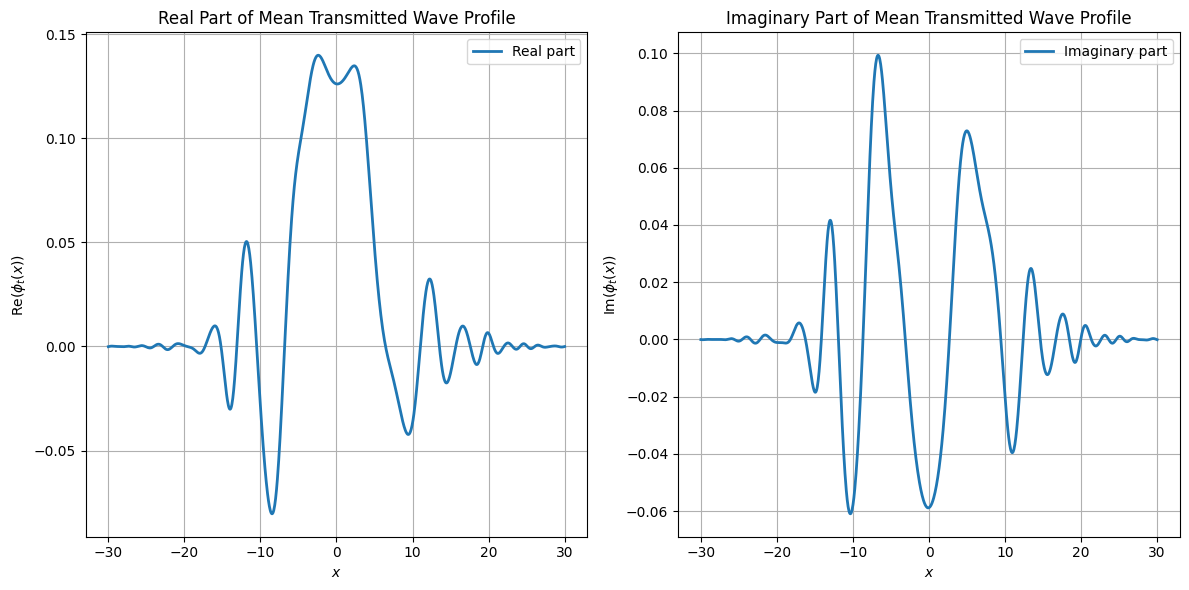

In [110]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Real part
axs[0].plot(x, np.real(phi_t_mean), label="Real part", linewidth=2)
axs[0].set_xlabel("$x$")
axs[0].set_ylabel(r"Re($\phi_t(x)$)")
axs[0].set_title("Real Part of Mean Transmitted Wave Profile")
axs[0].legend()
axs[0].grid(True)

# Imaginary part
axs[1].plot(x, np.imag(phi_t_mean), label="Imaginary part", linewidth=2)
axs[1].set_xlabel("$x$")
axs[1].set_ylabel(r"Im($\phi_t(x)$)")
axs[1].set_title("Imaginary Part of Mean Transmitted Wave Profile")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [111]:
# Theoretical result
gamma_0 = sigma**2 * z_c
rt = radius * np.sqrt(1 + 2j * L / (k * radius**2))
phi_t_theoretical_mean = (radius / rt) * np.exp(-x**2 / rt**2) * np.exp(-gamma_0 * k**2 * L / 8)

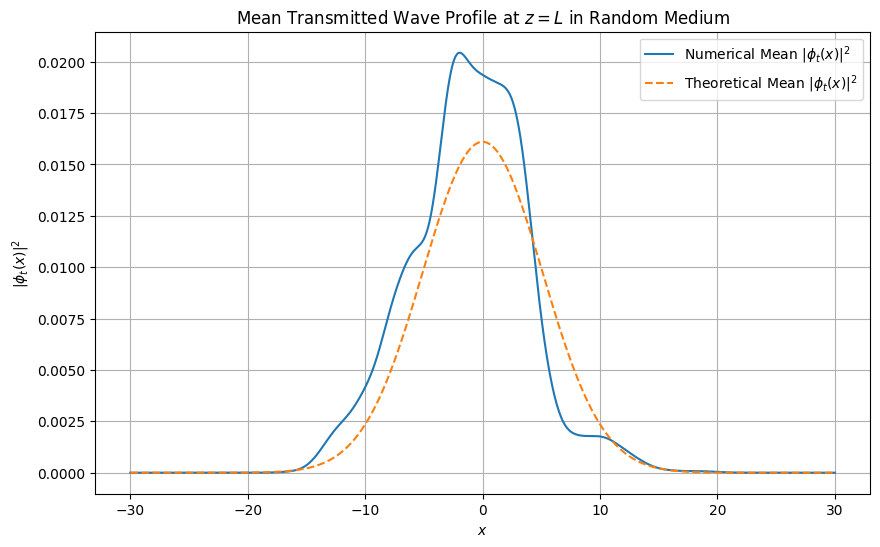

In [114]:
# Plotting  the results

plt.figure(figsize=(10, 6))
plt.plot(x, np.abs(phi_t_mean)**2, label=r"Numerical Mean $|\phi_t(x)|^2$")
plt.plot(x, np.abs(phi_t_theoretical_mean)**2, "--", label=r"Theoretical Mean $|\phi_t(x)|^2$")
plt.xlabel("$x$")
plt.ylabel(r"$|\phi_t(x)|^2$")
plt.title("Mean Transmitted Wave Profile at $z = L$ in Random Medium")
plt.legend()
plt.grid(True)
plt.show()